<a href="https://colab.research.google.com/github/avanish04/Bike-Sharing-Demand-Prediction---Capstone-Project/blob/main/Bike_Sharing_Demand_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

# importing the dataset and necessory libraries


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# importing importent libraries and modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression,Ridge,ElasticNet
from sklearn.metrics import r2_score, mean_squared_error
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.metrics import roc_auc_score, confusion_matrix, accuracy_score
from sklearn.tree import DecisionTreeRegressor


In [ ]:
#importing the dataset with the help of pandas
demand_df=pd.read_csv('/content/drive/MyDrive/ML capstone bike sharing demand/SeoulBikeData.csv',encoding= 'unicode_escape')


# High level look of our dataset


In [ ]:
#over view of our dataset
demand_df.head(5)

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [ ]:
demand_df.shape

(8760, 14)

In [ ]:
demand_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

**from the above outcome our dataset contains float64(6), int64(4), object(4) data types and it has : 8760 rows and 14 features**

In [ ]:
demand_df.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


In [ ]:
# percentile list
perc =[.25, .50, .75, .95]
demand_df.describe(percentiles=perc)

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
95%,2043.000000,22.000000,30.700000,94.000000,3.700000,2000.000000,22.405000,2.560000,0.400000,0.200000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


In [ ]:
demand_df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Date,8760,365,01/12/2017,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Rented Bike Count,8760.0,NaN,NaN,NaN,704.602055,644.997468,0.0,191.0,504.5,1065.25,3556.0
Hour,8760.0,NaN,NaN,NaN,11.5,6.922582,0.0,5.75,11.5,17.25,23.0
Temperature(°C),8760.0,NaN,NaN,NaN,12.882922,11.944825,-17.8,3.5,13.7,22.5,39.4
Humidity(%),8760.0,NaN,NaN,NaN,58.226256,20.362413,0.0,42.0,57.0,74.0,98.0
Wind speed (m/s),8760.0,NaN,NaN,NaN,1.724909,1.0363,0.0,0.9,1.5,2.3,7.4
Visibility (10m),8760.0,NaN,NaN,NaN,1436.825799,608.298712,27.0,940.0,1698.0,2000.0,2000.0
Dew point temperature(°C),8760.0,NaN,NaN,NaN,4.073813,13.060369,-30.6,-4.7,5.1,14.8,27.2
Solar Radiation (MJ/m2),8760.0,NaN,NaN,NaN,0.569111,0.868746,0.0,0.0,0.01,0.93,3.52
Rainfall(mm),8760.0,NaN,NaN,NaN,0.148687,1.128193,0.0,0.0,0.0,0.0,35.0


In [ ]:
demand_df[demand_df.duplicated()]

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day


In [ ]:
demand_df.isnull().values.any()


False

In [ ]:
demand_df.isnull().sum().sum()

0

**from above experiments we can say our dataset doesnot contain null values 
and duplicate values**

# EDA

first making a copy of our original dataset


In [ ]:
df=demand_df.copy()

In [ ]:
df

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes


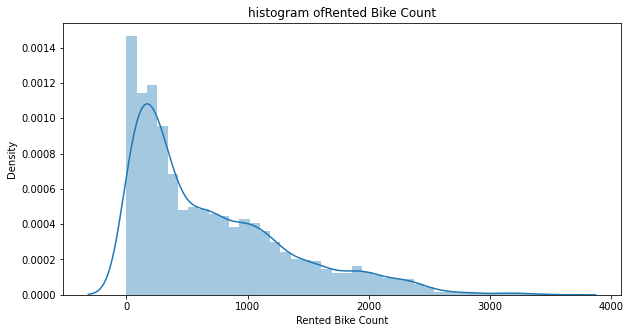

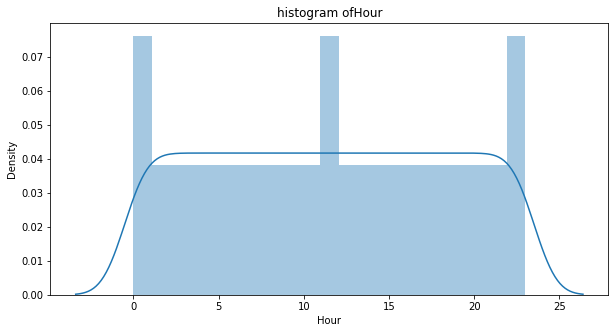

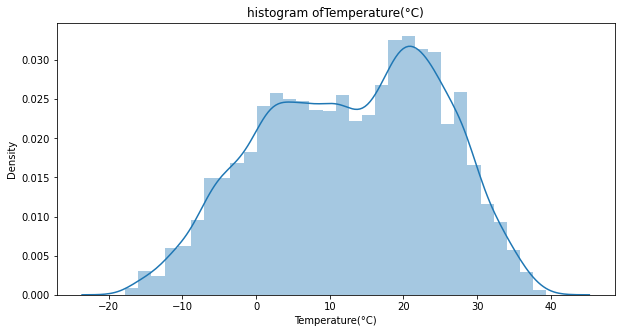

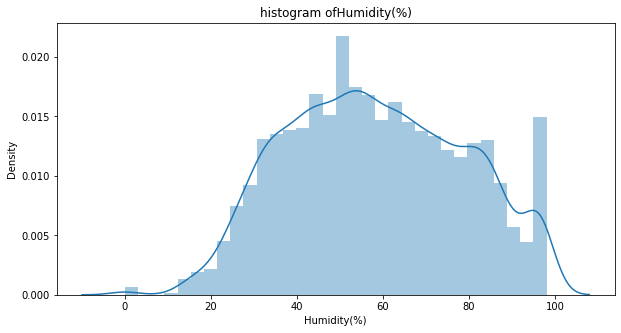

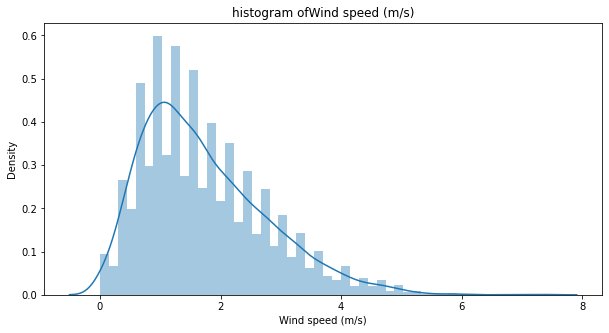

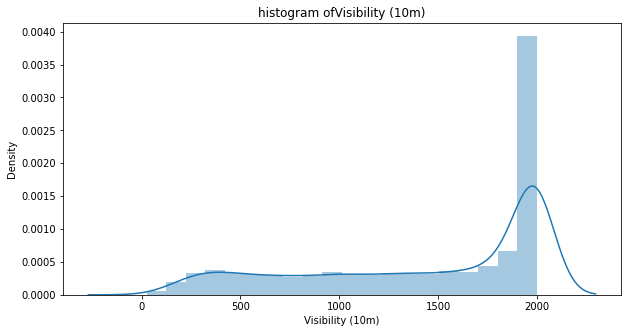

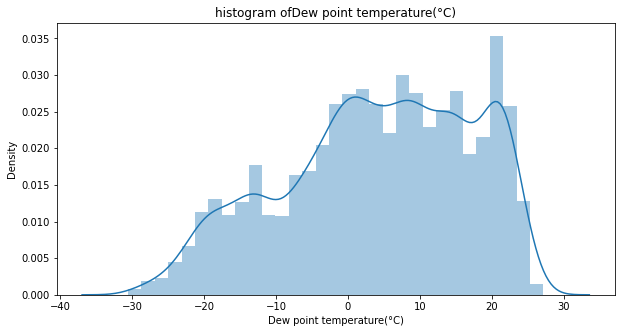

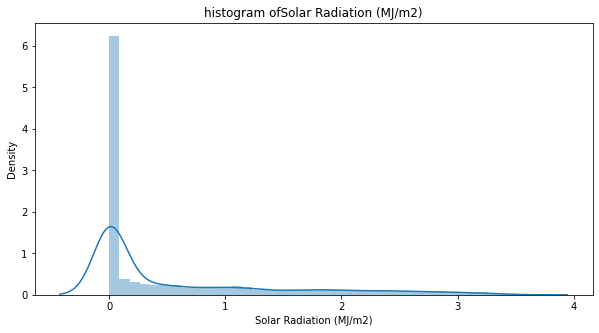

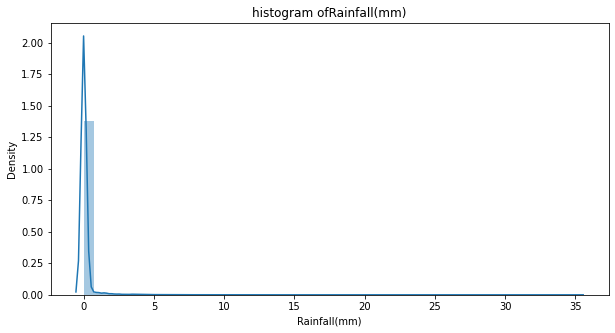

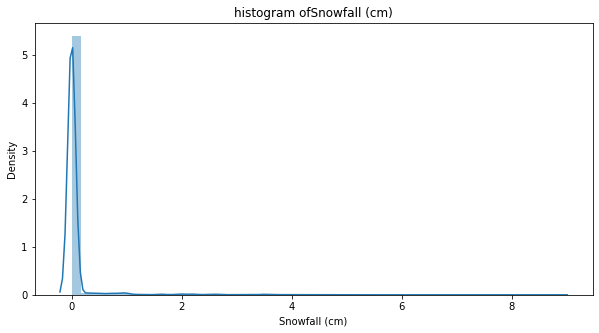

''

In [ ]:
# histogram of bike count
for i in list(df.describe().columns):
  plt.rcParams['figure.figsize'] = (10, 5)
  plt.title('histogram of'+i)
  ax=sns.distplot((df[i]) )
  plt.show()
;

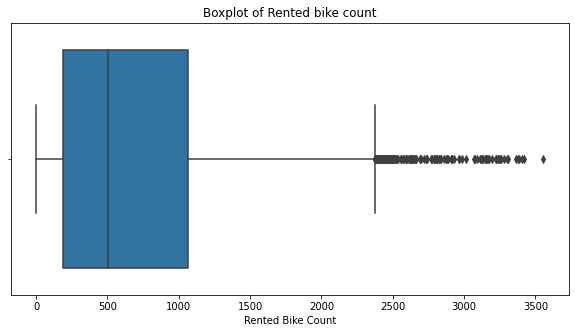

In [ ]:
plt.rcParams['figure.figsize'] = (10, 5)
plt.title('Boxplot of Rented bike count')
ax=sns.boxplot(df['Rented Bike Count'])

from the above box plot and the histogram we see that in our rented bike counts contains some outliers.

**outliers treatment**

In [ ]:
percentile_q1 = np.percentile(df['Rented Bike Count'],25)
print(percentile_q1)
percentile_q2 = np.percentile(df['Rented Bike Count'],50)
print(percentile_q2)
percentile_q3 = np.percentile(df['Rented Bike Count'],75)
print(percentile_q3)

191.0
504.5
1065.25


In [ ]:
IQR=percentile_q3-percentile_q1
print(IQR)
lower_side_outlier=percentile_q1-(1.5)*IQR
print(lower_side_outlier)
upper_side_outlier=percentile_q3+(1.5)*IQR
print(upper_side_outlier)

874.25
-1120.375
2376.625


In [ ]:
new_data=df[(df['Rented Bike Count']>lower_side_outlier) & (df['Rented Bike Count']<upper_side_outlier )]

In [ ]:
new_data.shape

(8602, 14)

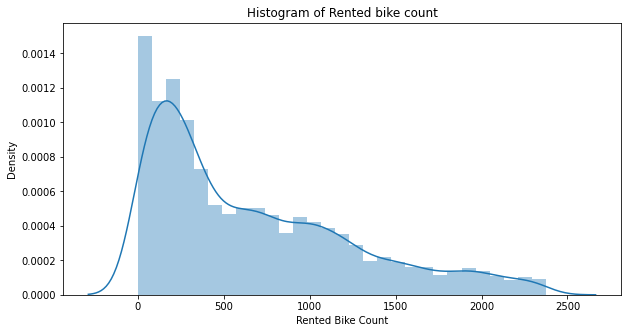

In [ ]:
# histogram of bike count
plt.rcParams['figure.figsize'] = (10, 5)
plt.title('Histogram of Rented bike count')
ax=sns.distplot(new_data['Rented Bike Count'] )

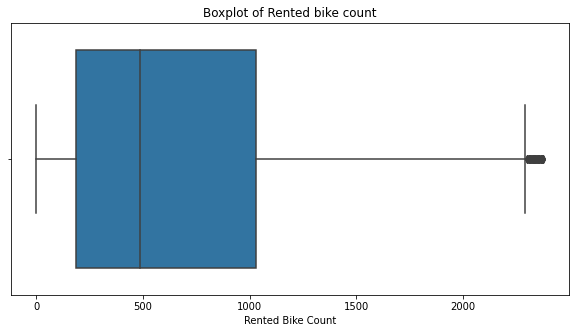

In [ ]:
plt.rcParams['figure.figsize'] = (10, 5)
plt.title('Boxplot of Rented bike count')
ax=sns.boxplot(new_data['Rented Bike Count']);

**After the treatment of the outliers we now have 8602 rows as compare to 8760 rows earlier**

In [ ]:
#numrical features in our dataset
numerical_features=list(new_data.describe().columns)

In [ ]:
numerical_features[1:]

['Hour',
 'Temperature(°C)',
 'Humidity(%)',
 'Wind speed (m/s)',
 'Visibility (10m)',
 'Dew point temperature(°C)',
 'Solar Radiation (MJ/m2)',
 'Rainfall(mm)',
 'Snowfall (cm)']

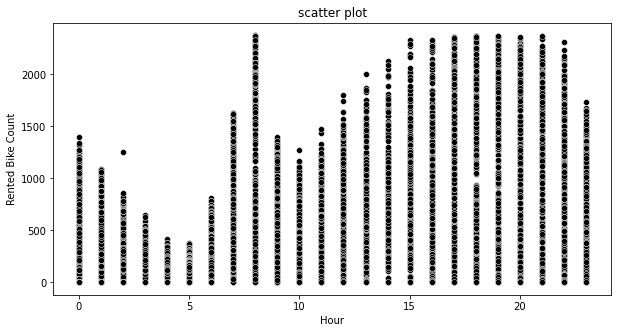

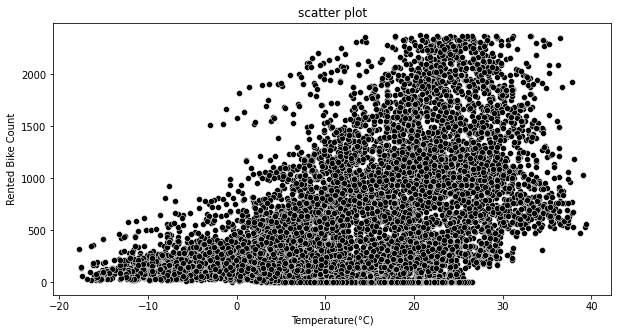

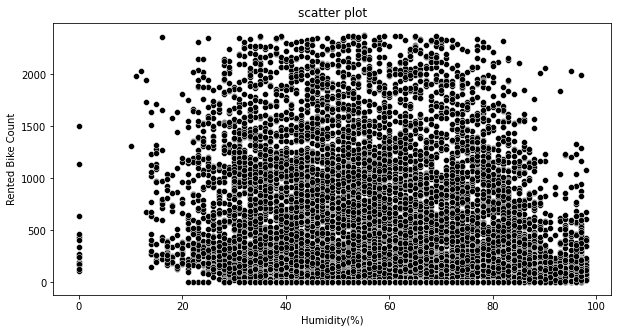

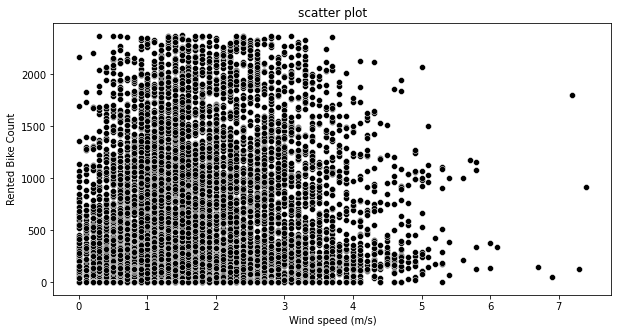

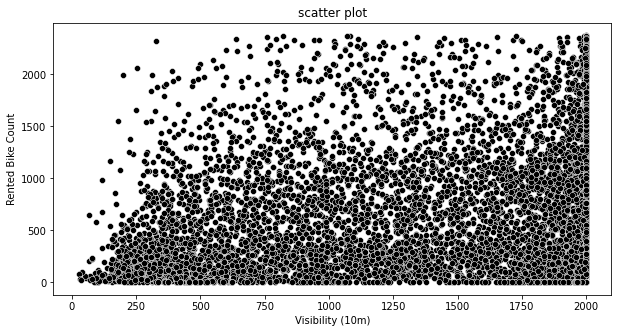

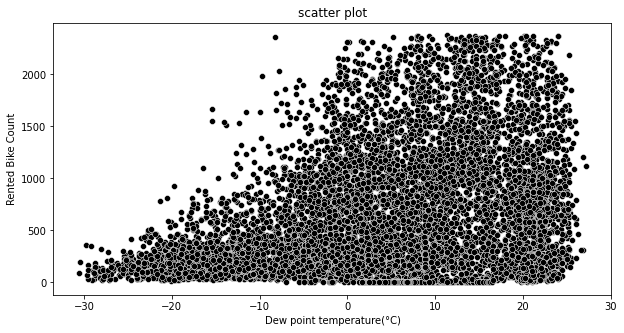

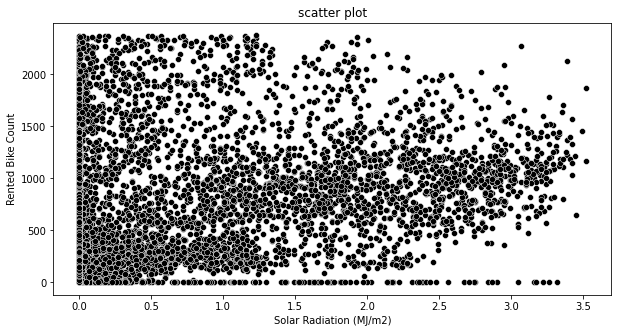

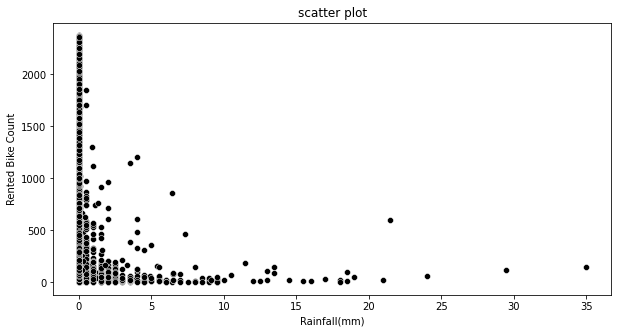

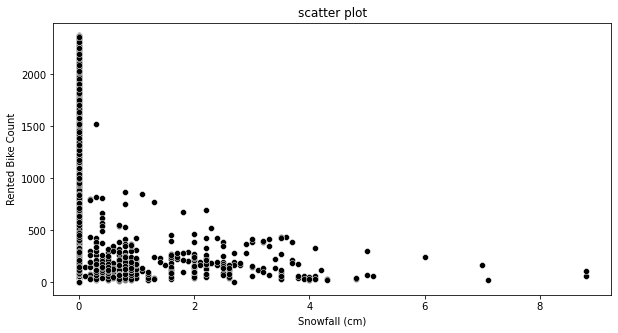

''

In [ ]:
for i in numerical_features[1:]:
  
  sns.scatterplot(new_data[i],new_data['Rented Bike Count'],color='black')

  plt.title('scatter plot')
  plt.ylabel('Rented Bike Count')
  plt.xlabel(i)
  plt.show()
;

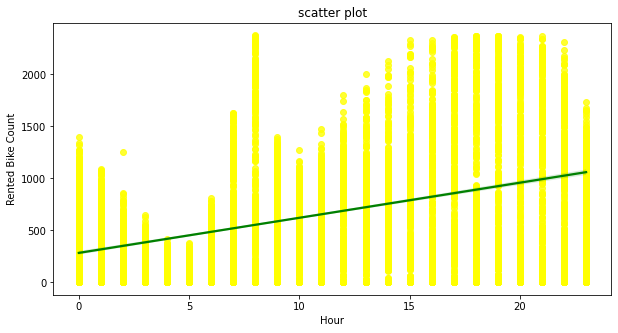

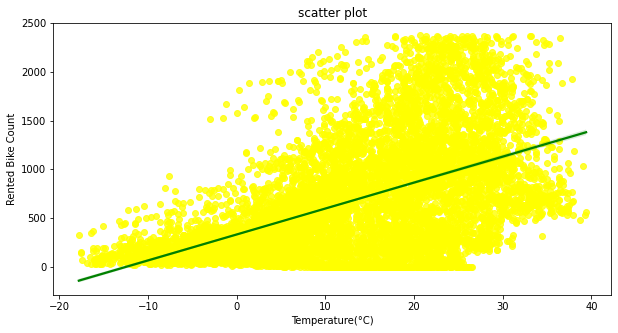

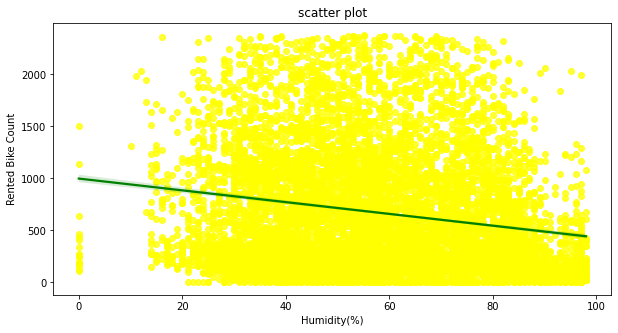

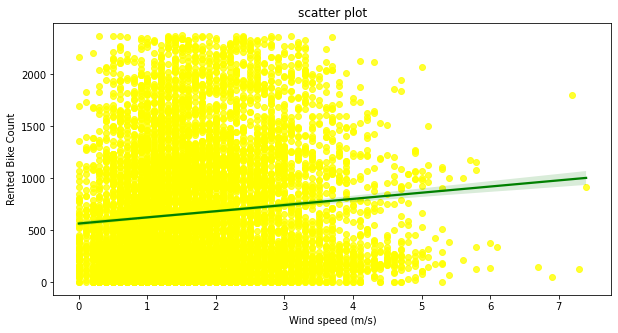

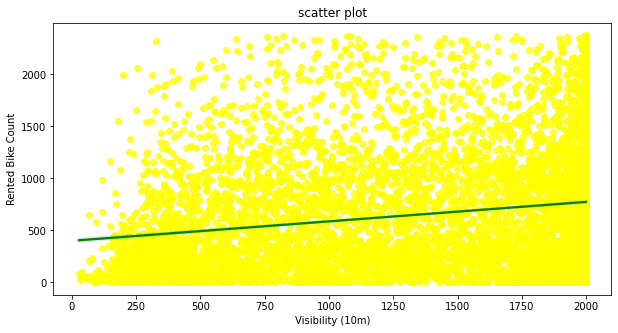

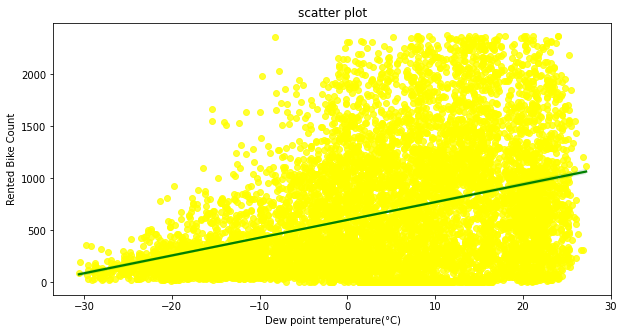

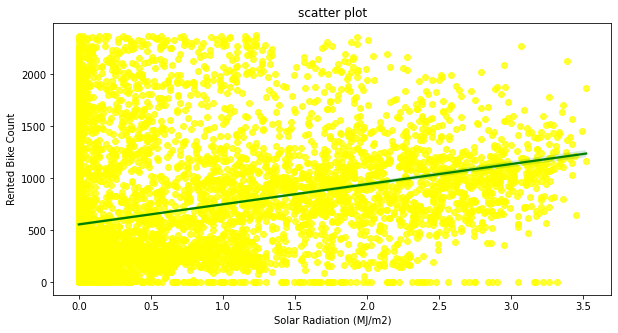

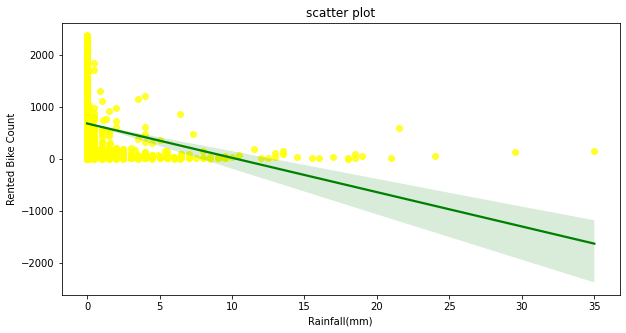

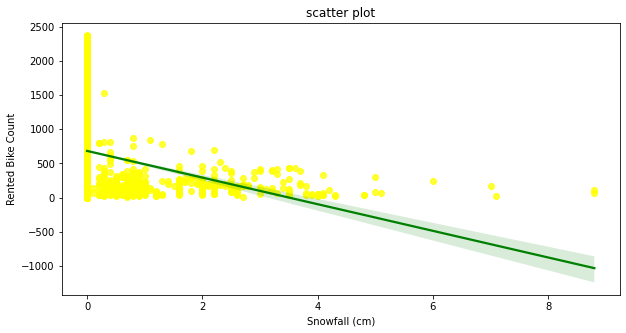

In [ ]:
for i in numerical_features[1:]:
  
  sns.regplot(new_data[i],new_data['Rented Bike Count'],scatter_kws={"color": "yellow"}, line_kws={"color": "green"})

  plt.title('scatter plot')
  plt.ylabel('Rented Bike Count')
  plt.xlabel(i)
  plt.show()

With the help of scatter plot we drew some regression line on the numerical independent variables and dependent variable

In [ ]:
new_data.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


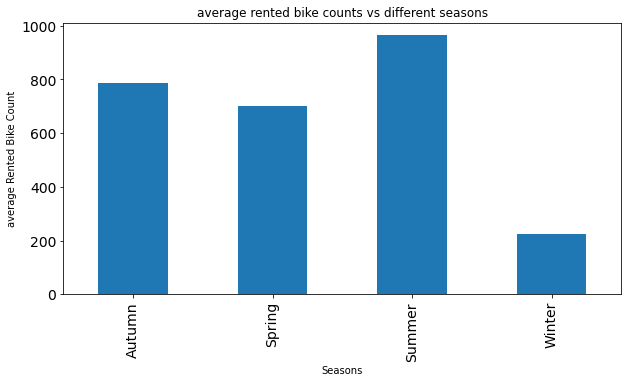

In [ ]:
#average rented bike count
ax = new_data.groupby(['Seasons'])['Rented Bike Count'].mean().plot.bar(
    figsize = (10,5),
    fontsize = 14)
plt.title('average rented bike counts vs different seasons')
plt.xlabel('Seasons')

plt.ylabel('average Rented Bike Count');

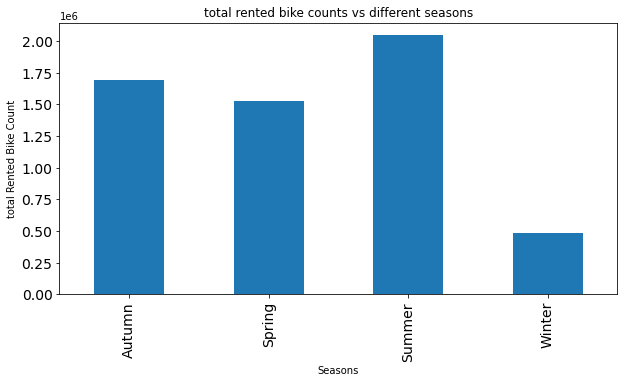

In [ ]:
#total rented bike count
ax = new_data.groupby(['Seasons'])['Rented Bike Count'].sum().plot.bar(
    figsize = (10,5),
    fontsize = 14)
plt.title('total rented bike counts vs different seasons')
plt.xlabel('Seasons')

plt.ylabel('total Rented Bike Count');

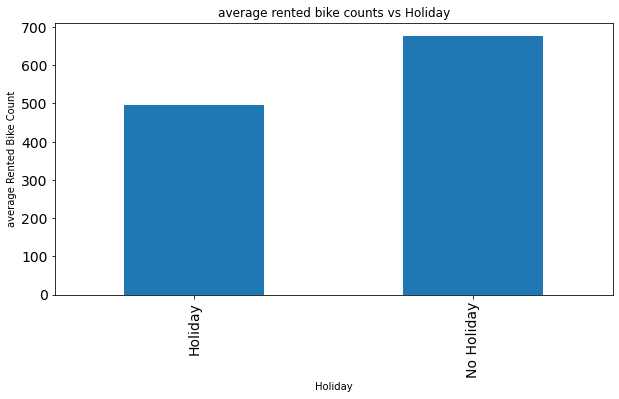

In [ ]:
# Avg. rented bike vs holidays or no holiday
ax = new_data.groupby(['Holiday'])['Rented Bike Count'].mean().plot.bar(
    figsize = (10,5),
    fontsize = 14)
plt.title('average rented bike counts vs Holiday')
plt.xlabel('Holiday')

plt.ylabel('average Rented Bike Count');

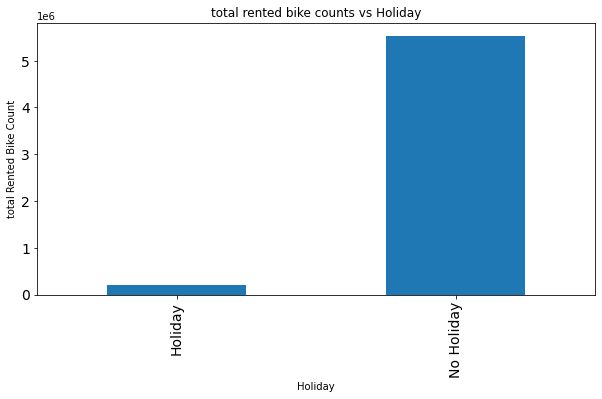

In [ ]:
#total Rented Bike Count on holidays vs no holiday.
ax = new_data.groupby(['Holiday'])['Rented Bike Count'].sum().plot.bar(
    figsize = (10,5),
    fontsize = 14)
plt.title('total rented bike counts vs Holiday')
plt.xlabel('Holiday')

plt.ylabel('total Rented Bike Count');

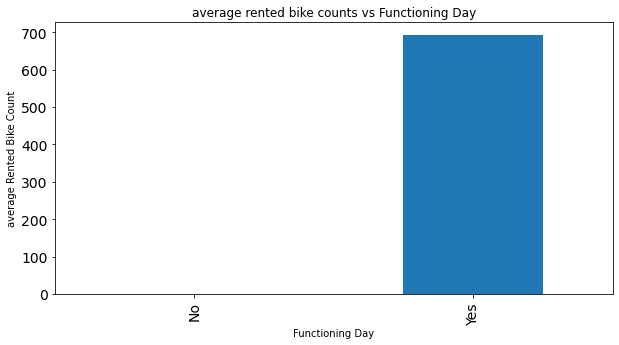

In [ ]:
# from the below bar char we can saw that all the bike counts are on the fuctioning day
ax = new_data.groupby(['Functioning Day'])['Rented Bike Count'].mean().plot.bar(
    figsize = (10,5),
    fontsize = 14)
plt.title('average rented bike counts vs Functioning Day')
plt.xlabel('Functioning Day')

plt.ylabel('average Rented Bike Count');

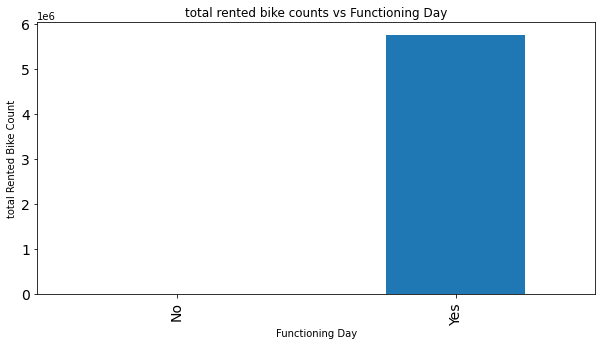

In [ ]:
#total rented bike counts vs Functioning Day
ax = new_data.groupby(['Functioning Day'])['Rented Bike Count'].sum().plot.bar(
    figsize = (10,5),
    fontsize = 14)
plt.title('total rented bike counts vs Functioning Day')
plt.xlabel('Functioning Day')

plt.ylabel('total Rented Bike Count');

In [ ]:
#changing the datatype of date feature from object type to datetime .
new_data['Date'] = pd.to_datetime(new_data['Date'])


new_data['month']=new_data.Date.dt.month

new_data['Day_name']=new_data.Date.dt.day_name()
new_data['year']=new_data.Date.dt.year


In [ ]:
new_data.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,month,Day_name,year
0,2017-01-12,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,Thursday,2017
1,2017-01-12,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,Thursday,2017
2,2017-01-12,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,1,Thursday,2017
3,2017-01-12,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,Thursday,2017
4,2017-01-12,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,Thursday,2017


In [ ]:
new_data.shape

(8602, 17)

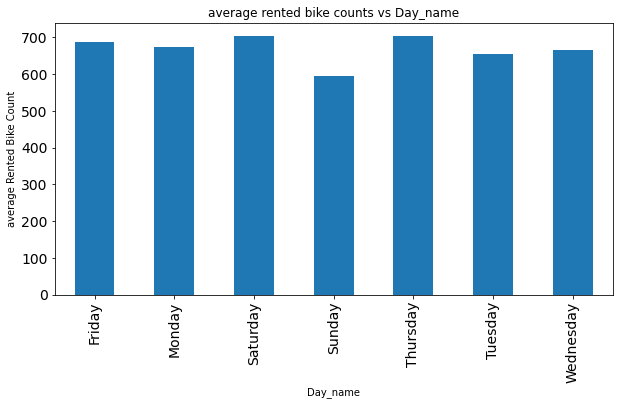

In [ ]:
ax = new_data.groupby(['Day_name'])['Rented Bike Count'].mean().plot.bar(
    figsize = (10,5),
    fontsize = 14)
plt.title('average rented bike counts vs Day_name')
plt.xlabel('Day_name')

plt.ylabel('average Rented Bike Count');

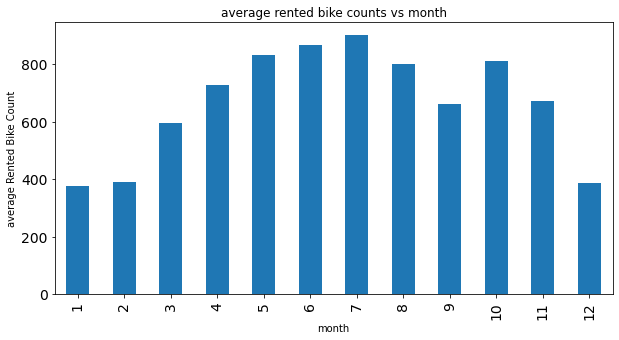

In [ ]:
ax = new_data.groupby(['month'])['Rented Bike Count'].mean().plot.bar(
    figsize = (10,5),
    fontsize = 14)
plt.title('average rented bike counts vs month')
plt.xlabel('month')

plt.ylabel('average Rented Bike Count');

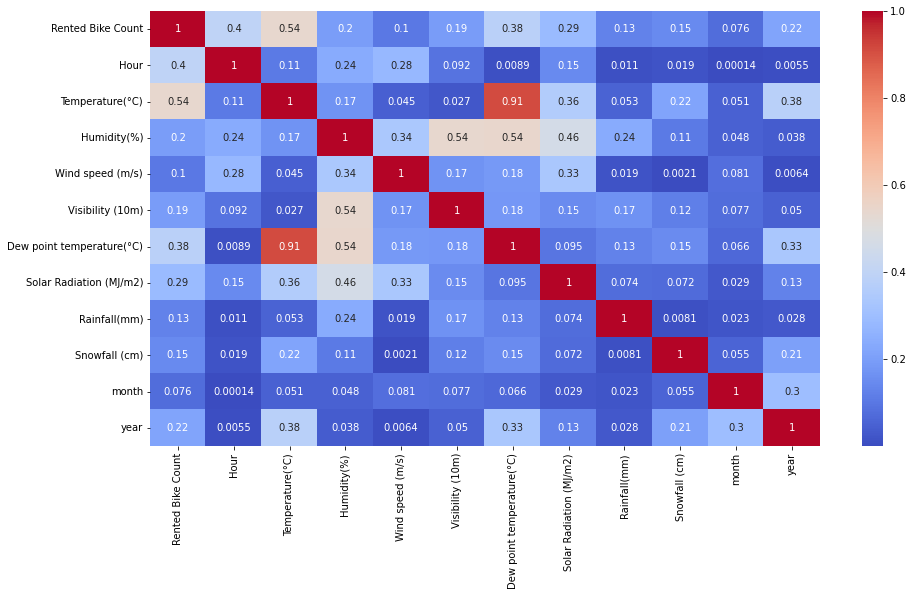

In [ ]:
plt.figure(figsize=(15,8))
correlation = new_data.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm');

**from the above heatmap we can there are some features which have correlation between them. the maximum correlation is between Dew Point Temperature and Temperature then humidity and visiblilty**

# **1. linear regression**

In [ ]:
# checking for multicollinearity with the help of VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(new_data):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = new_data.columns
    vif["VIF"] = [variance_inflation_factor(new_data.values, i) for i in range(new_data.shape[1])]

    return(vif)

In [ ]:
calc_vif(new_data[[i for i in new_data.describe().columns if i not in ['Rented Bike Count']]])

,variables,VIF
0,Hour,4.342032
1,Temperature(°C),187.437533
2,Humidity(%),188.653814
3,Wind speed (m/s),4.792025
4,Visibility (10m),10.331501
5,Dew point temperature(°C),128.262905
6,Solar Radiation (MJ/m2),2.929473
7,Rainfall(mm),1.104568
8,Snowfall (cm),1.134331
9,month,4.686302


\**From the above experiment i can conclude that Temperature and Dew point temperature(°C) has the VIF more than 10 . so we have to remove one of them then see and year also have high vif so we have to remove it**

In [ ]:
new_data.drop(['Dew point temperature(°C)','year'], axis = 1,inplace=True)

In [ ]:
calc_vif(new_data[[i for i in new_data.describe().columns if i not in ['Rented Bike Count']]])

,variables,VIF
0,Hour,3.865340
1,Temperature(°C),3.208255
2,Humidity(%),6.051221
3,Wind speed (m/s),4.572058
4,Visibility (10m),5.259014
5,Solar Radiation (MJ/m2),2.290082
6,Rainfall(mm),1.081763
7,Snowfall (cm),1.125653
8,month,4.543682


now our dataset features have VIF of less than 10. so now our numerical features do not multicollinearity.

# feature engineering

In [ ]:
new_data['Functioning Day']=new_data['Functioning Day'].apply(lambda x : 1 if(x=="Yes") else 0)
new_data['Holiday']=new_data['Holiday'].apply(lambda x : 1 if(x=="No Holiday") else 0)


In [ ]:
linear_df=new_data.copy()

In [ ]:
linear_df.shape

(8602, 15)

In [ ]:
#one hot encoding on categorical variables
linear_df= pd.get_dummies(linear_df, columns=['month'], prefix=['month'])


In [ ]:
linear_df.head(5)

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Day_name,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
0,2017-01-12,254,0,-5.2,37,2.2,2000,0.0,0.0,0.0,Winter,1,1,Thursday,1,0,0,0,0,0,0,0,0,0,0,0
1,2017-01-12,204,1,-5.5,38,0.8,2000,0.0,0.0,0.0,Winter,1,1,Thursday,1,0,0,0,0,0,0,0,0,0,0,0
2,2017-01-12,173,2,-6.0,39,1.0,2000,0.0,0.0,0.0,Winter,1,1,Thursday,1,0,0,0,0,0,0,0,0,0,0,0
3,2017-01-12,107,3,-6.2,40,0.9,2000,0.0,0.0,0.0,Winter,1,1,Thursday,1,0,0,0,0,0,0,0,0,0,0,0
4,2017-01-12,78,4,-6.0,36,2.3,2000,0.0,0.0,0.0,Winter,1,1,Thursday,1,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
linear_df.drop(['Date'],axis=1,inplace=True)
linear_df.drop(['Day_name'],axis=1,inplace=True)
linear_df.drop(['Seasons'],axis=1,inplace=True)

In [ ]:
linear_df.shape

(8602, 23)

In [ ]:
# Create a list of independent variables
dependent_variable='Rented Bike Count'


independent_variables = list(set(linear_df.columns.tolist()) - {dependent_variable})

In [ ]:
independent_variables

['month_4',
 'Functioning Day',
 'Hour',
 'Snowfall (cm)',
 'month_11',
 'month_12',
 'Temperature(°C)',
 'month_7',
 'Visibility (10m)',
 'Holiday',
 'Solar Radiation (MJ/m2)',
 'Wind speed (m/s)',
 'month_10',
 'month_8',
 'month_6',
 'month_9',
 'Rainfall(mm)',
 'month_3',
 'month_1',
 'month_5',
 'Humidity(%)',
 'month_2']

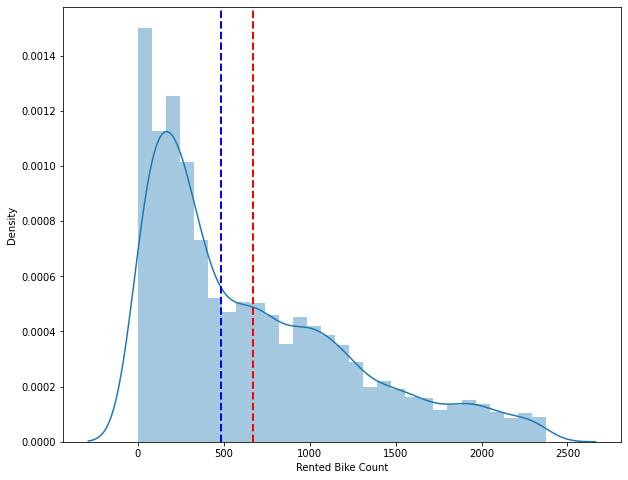

In [ ]:
#Remove the skewness
plt.figure(figsize=(10,8))
plt.xlabel('Rented Bike Count')
ax=sns.distplot(linear_df['Rented Bike Count'])
ax.axvline((linear_df['Rented Bike Count']).mean(), color='r', linestyle='dashed', linewidth=2)
ax.axvline((linear_df['Rented Bike Count']).median(), color='b', linestyle='dashed', linewidth=2)

plt.show()

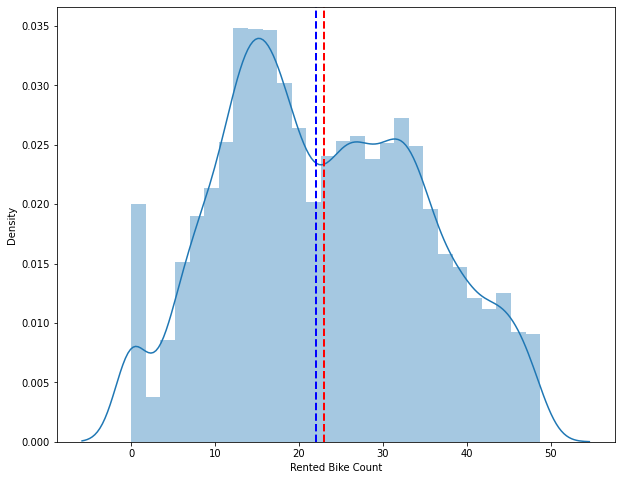

In [ ]:
#lets try suareroot transformation for removing skewnwss
plt.figure(figsize=(10,8))
plt.xlabel('Rented Bike Count')
ax=sns.distplot(np.sqrt(linear_df['Rented Bike Count']))
ax.axvline(np.sqrt((linear_df['Rented Bike Count'])).mean(), color='r', linestyle='dashed', linewidth=2)
ax.axvline(np.sqrt((linear_df['Rented Bike Count'])).median(), color='b', linestyle='dashed', linewidth=2)

plt.show()

**After doing the transformation on our dependent variable we will get less skewed curve hence we take this forward**

**Train test split**

In [ ]:
X=linear_df[independent_variables].values
y=np.sqrt(linear_df[dependent_variable])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split( X,y , test_size = 0.25, random_state = 0) 
print(X_train.shape)
print(X_test.shape)

(6451, 22)
(2151, 22)


In [ ]:
X_train[0:10]

array([[ 0.000e+00,  1.000e+00,  1.600e+01,  0.000e+00,  0.000e+00,
         0.000e+00,  6.000e+00,  0.000e+00,  1.183e+03,  1.000e+00,
         1.030e+00,  1.700e+00,  0.000e+00,  0.000e+00,  0.000e+00,
         1.000e+00,  0.000e+00,  0.000e+00,  0.000e+00,  0.000e+00,
         2.800e+01,  0.000e+00],
       [ 0.000e+00,  1.000e+00,  2.300e+01,  0.000e+00,  0.000e+00,
         0.000e+00, -6.000e-01,  0.000e+00,  1.731e+03,  1.000e+00,
         0.000e+00,  1.300e+00,  0.000e+00,  0.000e+00,  0.000e+00,
         0.000e+00,  0.000e+00,  0.000e+00,  0.000e+00,  0.000e+00,
         3.900e+01,  1.000e+00],
       [ 0.000e+00,  1.000e+00,  1.200e+01,  0.000e+00,  0.000e+00,
         0.000e+00,  1.830e+01,  0.000e+00,  1.489e+03,  1.000e+00,
         2.400e+00,  1.200e+00,  0.000e+00,  0.000e+00,  0.000e+00,
         0.000e+00,  0.000e+00,  0.000e+00,  0.000e+00,  1.000e+00,
         6.500e+01,  0.000e+00],
       [ 0.000e+00,  1.000e+00,  1.500e+01,  0.000e+00,  0.000e+00,
         0.000e+0

In [ ]:
#scaling with the help of MinMax scaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
X_train[0:10]

array([[0.        , 1.        , 0.69565217, 0.        , 0.        ,
        0.        , 0.41300527, 0.        , 0.58590978, 1.        ,
        0.29261364, 0.23287671, 0.        , 0.        , 0.        ,
        1.        , 0.        , 0.        , 0.        , 0.        ,
        0.28571429, 0.        ],
       [0.        , 1.        , 1.        , 0.        , 0.        ,
        0.        , 0.2970123 , 0.        , 0.8636594 , 1.        ,
        0.        , 0.17808219, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.39795918, 1.        ],
       [0.        , 1.        , 0.52173913, 0.        , 0.        ,
        0.        , 0.62917399, 0.        , 0.74100355, 1.        ,
        0.68181818, 0.16438356, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 1.        ,
        0.66326531, 0.        ],
       [0.        , 1.        , 0.65217391, 0.        , 0.        ,
        0.       

In [ ]:
# Fitting Multiple Linear Regression to the Training set
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)

In [ ]:
print(y_pred)
print(y_test)

[23.046875  0.4375   18.515625 ... 13.       32.375    35.84375 ]
4248    33.000000
3154     0.000000
140     13.784049
6375    28.930952
7654    37.107951
          ...    
4931    29.495762
8688    21.213203
2767    24.103942
5578    26.438608
3407    31.432467
Name: Rented Bike Count, Length: 2151, dtype: float64


In [ ]:
#evalution matrix
mean_squared_error(y_test**2, y_pred**2)

139405.39835994857

In [ ]:
RMSE = np.sqrt(mean_squared_error(y_test**2, y_pred**2))
print("RMSE :" ,RMSE)

RMSE : 373.3703233519619


In [ ]:
r2_score(y_test**2, y_pred**2)

0.5880033843748618

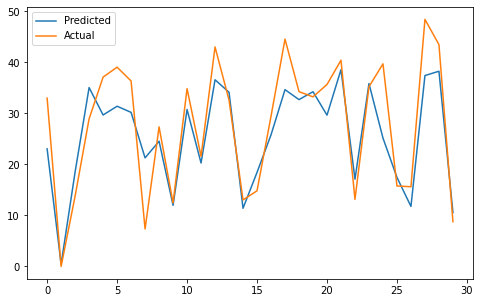

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(y_pred[:30])
plt.plot(np.array(y_test[:30]))
plt.legend(["Predicted","Actual"])
plt.show()

**R2 score of linear regression model is approaximate 0.58.
hence we have to go for the more models like Lasso,Ridge and if the efficiency wont increase in the sufficient way then we have to go to the more advance model like XGBoost, Randomforest etc**

# 2. Lasso regression with cross validation.

In [ ]:
from sklearn.linear_model import Lasso
lasso  = Lasso(alpha=0.1 , max_iter= 3000)

lasso.fit(X_train, y_train)

Lasso(alpha=0.1, max_iter=3000)

In [ ]:
y_pred_lasso= lasso.predict(X_test)

In [ ]:
r2_score(y_test**2, y_pred_lasso**2)

0.5386142112334372

**hyper parameter tunning and cross validation**

In [ ]:
lasso = Lasso()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=5)
lasso_regressor.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100]},
             scoring='neg_mean_squared_error')

In [ ]:
print("The best fit alpha value is found out to be :" ,lasso_regressor.best_params_)

The best fit alpha value is found out to be : {'alpha': 0.001}


*from the above gridsearchcv model we get the best alpha is 0.1*

In [ ]:
y_pred_lassocv = lasso_regressor.predict(X_test)

In [ ]:
mean_squared_error(y_test**2, y_pred_lassocv**2)

139827.19831302005

In [ ]:
RMSE = np.sqrt(mean_squared_error(y_test**2, y_pred_lassocv**2))
print("RMSE :" ,RMSE)


RMSE : 373.93475141128573


In [ ]:
r2_score(y_test**2, y_pred_lassocv**2)

0.5867568031435699

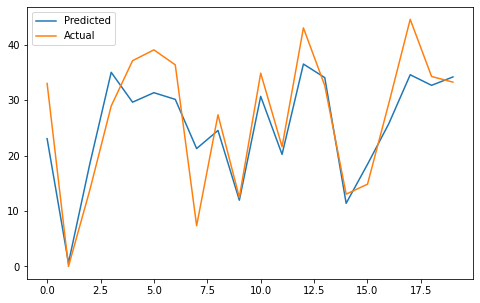

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(((y_pred_lassocv[:20])))
plt.plot(np.array((y_test[:20])))
plt.legend(["Predicted","Actual"])
plt.show()

**from the Lasso we also get the same r2score as we got from linear regression i.e, ~0.58**

# 3. Ridge regression implementation

In [ ]:
ridge = Ridge()
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=5)
ridge_regressor.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 1, 5, 10, 20, 30, 40, 45, 50, 55, 60,
                                   100]},
             scoring='neg_mean_squared_error')

In [ ]:
print("The best fit alpha value is found out to be :" ,ridge_regressor.best_params_)

The best fit alpha value is found out to be : {'alpha': 1}


*for the ridge alpha is 1*

In [ ]:
y_pred_ridgecv=ridge_regressor.predict(X_test)

In [ ]:
mean_squared_error(y_test**2, y_pred_ridgecv**2)

140317.44556981703

In [ ]:
RMSE = np.sqrt(mean_squared_error(y_test**2, y_pred_ridgecv**2))
print("RMSE :" ,RMSE)

RMSE : 374.589702968217


In [ ]:
r2_score(y_test**2, y_pred_ridgecv**2)

0.585307933781292

#4. elastic net regression

In [ ]:
elastic = ElasticNet()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100],'l1_ratio':[0.1,0.3,0.4,0.5,0.6,0.7,0.8]}
elastic_regressor = GridSearchCV(elastic, parameters, scoring='neg_mean_squared_error',cv=5)
elastic_regressor.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100],
                         'l1_ratio': [0.1, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]},
             scoring='neg_mean_squared_error')

In [ ]:
print("The best fit alpha value is found out to be :" ,elastic_regressor.best_params_)

The best fit alpha value is found out to be : {'alpha': 0.0001, 'l1_ratio': 0.1}


In [ ]:
y_pred_elastic=elastic_regressor.predict(X_test)

In [ ]:
mean_squared_error(y_test**2, y_pred_elastic**2)

140060.32752211505

In [ ]:
RMSE = np.sqrt(mean_squared_error(y_test**2, y_pred_elastic**2))
print("RMSE :" ,RMSE)

RMSE : 374.24634603709234


In [ ]:
r2_score(y_test**2, y_pred_elastic**2)

0.5860678165886697

**From the above 4 models(i.e, linear,lasso,ridge,elastic net) all have the approximate same r2score(0.584), MSME(139769.79), RMSE(373.85)**

# **Advance models**

# 1. Decision Tree

In [ ]:
df=demand_df.copy()

In [ ]:
#changing the datatype of date feature from object type to datetime .
df['Date'] = pd.to_datetime(df['Date'])


df['month']=df.Date.dt.month
df['day_name']=df.Date.dt.day_name()



In [ ]:
df.drop(['Date'],axis=1,inplace=True)

In [ ]:
df['Functioning Day']=df['Functioning Day'].apply(lambda x : 1 if(x=="Yes") else 0)
df['Holiday']=df['Holiday'].apply(lambda x : 1 if(x=="No Holiday") else 0)


In [ ]:
def hours(hour):
  if 0<= hour <= 12:
    hour='AM'
  else:
    hour='PM'
  return hour


In [ ]:
# changing hour feature into categorical variable
df['Hour']=df['Hour'].apply(hours)

In [ ]:
df.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,month,day_name
0,254,AM,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,1,1,1,Thursday
1,204,AM,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,1,1,1,Thursday
2,173,AM,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,1,1,1,Thursday
3,107,AM,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,1,1,1,Thursday
4,78,AM,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,1,1,1,Thursday


In [ ]:
 df= pd.get_dummies(df, columns=["month",'Hour','day_name'], prefix=["month",'day_name','Hour'])


In [ ]:
df.head()

,Rented Bike Count,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,day_name_AM,day_name_PM,Hour_Friday,Hour_Monday,Hour_Saturday,Hour_Sunday,Hour_Thursday,Hour_Tuesday,Hour_Wednesday
0,254,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
1,204,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
2,173,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
3,107,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
4,78,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0


In [ ]:
df.drop(['Seasons'],axis=1,inplace=True)

In [ ]:
# Create a list of independent variables
dependent_variable='Rented Bike Count'


independent_variables = list(set(df.columns.tolist()) - {dependent_variable})

In [ ]:
independent_variables

['Hour_Tuesday',
 'month_5',
 'Hour_Monday',
 'month_3',
 'Snowfall (cm)',
 'month_9',
 'Hour_Friday',
 'day_name_PM',
 'month_8',
 'Dew point temperature(°C)',
 'month_4',
 'month_10',
 'month_7',
 'Hour_Sunday',
 'Wind speed (m/s)',
 'month_11',
 'day_name_AM',
 'month_6',
 'Functioning Day',
 'Hour_Thursday',
 'Humidity(%)',
 'Hour_Saturday',
 'Visibility (10m)',
 'month_2',
 'Temperature(°C)',
 'Hour_Wednesday',
 'month_12',
 'Rainfall(mm)',
 'month_1',
 'Solar Radiation (MJ/m2)',
 'Holiday']

In [ ]:
X=df[independent_variables].values
y=df[dependent_variable].values

In [ ]:
# train test split
X_train, X_test, y_train, y_test = train_test_split( X,y , test_size = 0.25, random_state = 0) 
print(X_train.shape)
print(X_test.shape)

(6570, 31)
(2190, 31)


In [ ]:
y_train

array([ 379, 1055,  122, ..., 1066,  401,  513])

In [ ]:
# Applying decision tree with gridsearchCV
parameters = {'criterion':['squared_error',  'absolute_error', 'poisson'],'max_depth': [10,100,1000,10000],'max_leaf_nodes':[10,100,1000]}
decision_regressor=DecisionTreeRegressor()
decision_regressor = GridSearchCV(decision_regressor, parameters,cv=3)
decision_regressor.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'absolute_error',
                                       'poisson'],
                         'max_depth': [10, 100, 1000, 10000],
                         'max_leaf_nodes': [10, 100, 1000]})

In [ ]:
decision_regressor.best_params_

{'criterion': 'absolute_error', 'max_depth': 10, 'max_leaf_nodes': 100}

In [ ]:
train_preds_d =  decision_regressor.predict(X_train)
test_preds_d  = decision_regressor.predict(X_test)

In [ ]:
# Obtain accuracy on train set
r2_score(y_train,train_preds_d)

0.7774046793949021

In [ ]:
r2_score(y_test,test_preds_d)

0.7120777954865605

# 2. Random forest 

In [ ]:
# Applying random forest with gridsearchCV
parameters = {'n_estimators':[100,1000], 'max_depth': [10,100,1000,10000], 'max_leaf_nodes':[1,10,100,1000]}
model_rf = RandomForestRegressor() 
rf_regressor = GridSearchCV(model_rf, parameters,cv=3)
rf_regressor.fit(X_train, y_train)





GridSearchCV(cv=3, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [10, 100, 1000, 10000],
                         'max_leaf_nodes': [1, 10, 100, 1000],
                         'n_estimators': [100, 1000]})

In [ ]:
rf_regressor.best_params_

{'max_depth': 1000, 'max_leaf_nodes': 1000, 'n_estimators': 1000}

In [ ]:
train_preds_rf =  rf_regressor.predict(X_train)
test_preds_rf  = rf_regressor.predict(X_test)

In [ ]:
# Obtain r2score on train set
print(r2_score(y_train,train_preds_rf))
print(r2_score(y_test,test_preds_rf))

0.9652138952647944
0.802838166213226


# 3. GBM

In [ ]:
model_gbm = GradientBoostingRegressor()
model_gbm.fit(X_train, y_train)

GradientBoostingRegressor()

In [ ]:
train_preds_gbm =  model_gbm.predict(X_train)
test_preds_gbm  = model_gbm.predict(X_test)

In [ ]:
# Obtain r2score on train set
print(r2_score(y_train,train_preds_gbm))
print(r2_score(y_test,test_preds_gbm))

0.7805748139593098
0.7548583026712394


**fro the above three advance model namely: dicision tree, Random forest, GBM.
i got the maximum r2score in Randomforest model.**